In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


# EXPLORATORY DATA ANALYSIS

In [4]:
import pandas as pd
Data_Day = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/loan_prediction.csv')
Data_Day

Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]

In [5]:
import pandas_profiling

In [6]:
report = pandas_profiling.ProfileReport(Data_Day)

In [7]:
report  ## Refer the various sections & Toggle the deatils for more insight.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
Data_Day.shape

(614, 13)

In [9]:
Data_Day.dropna(inplace = True)
Data_Day

Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
5    LP001011    Male     Yes  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[480 rows x 13 columns]

In [10]:
Data_Day.shape

(480, 13)

Looking at the summary provides us an inference that there are soome null values in the dataframe, which we need to remove before we proceed further.

In [11]:
#Deleting duplicate rows
Data_Day = Data_Day.drop_duplicates()
Data_Day

Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
5    LP001011    Male     Yes  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[480 rows x 13 columns]

In [12]:
Data_Day.info

<bound method DataFrame.info of       Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
5    LP001011    Male     Yes  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[480 rows x 13 columns]>

In [13]:
Data_Day.describe()

ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
count       480.000000         480.000000  ...        480.000000      480.000000
mean       5364.231250        1581.093583  ...        342.050000        0.854167
std        5668.251251        2617.692267  ...         65.212401        0.353307
min         150.000000           0.000000  ...         36.000000        0.000000
25%        2898.750000           0.000000  ...        360.000000        1.000000
50%        3859.000000        1084.500000  ...        360.000000        1.000000
75%        5852.500000        2253.250000  ...        360.000000        1.000000
max       81000.000000       33837.000000  ...        480.000000        1.000000

[8 rows x 5 columns]

In [14]:
#unique values present in each variable
Data_Day.nunique()

Loan_ID              480
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# DATA PRE PROCESSING

In [15]:
!pip install klib

In [16]:
import klib

In [17]:
import klib
klib.missingval_plot(Data_Day)

No missing values found in the dataset.


In [18]:
# Check NA Values
Data_Day.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#columns 
Data_Day.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Since Loan ID is not going to add value to further EDA & predctions therefore it need to be dropped as variable here.

In [20]:
Data_Day.drop(['Loan_ID'], axis='columns', inplace = True)
Data_Day

Gender Married Dependents  ... Credit_History Property_Area  Loan_Status
1      Male     Yes          1  ...            1.0         Rural            N
2      Male     Yes          0  ...            1.0         Urban            Y
3      Male     Yes          0  ...            1.0         Urban            Y
4      Male      No          0  ...            1.0         Urban            Y
5      Male     Yes          2  ...            1.0         Urban            Y
..      ...     ...        ...  ...            ...           ...          ...
609  Female      No          0  ...            1.0         Rural            Y
610    Male     Yes         3+  ...            1.0         Rural            Y
611    Male     Yes          1  ...            1.0         Urban            Y
612    Male     Yes          2  ...            1.0         Urban            Y
613  Female      No          0  ...            0.0     Semiurban            N

[480 rows x 12 columns]

In [21]:
Data_Day.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
#Defining numeric and categorical variables and saving in specific array
numeric_var = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
categorical_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

Here we can easily interpret that cradit hisotry is a varible that talk about wheather one aas been capable of paying the loan amount or not.

In [23]:
Data_Day['Credit_History'].astype(int)
Data_Day

Gender Married Dependents  ... Credit_History Property_Area  Loan_Status
1      Male     Yes          1  ...            1.0         Rural            N
2      Male     Yes          0  ...            1.0         Urban            Y
3      Male     Yes          0  ...            1.0         Urban            Y
4      Male      No          0  ...            1.0         Urban            Y
5      Male     Yes          2  ...            1.0         Urban            Y
..      ...     ...        ...  ...            ...           ...          ...
609  Female      No          0  ...            1.0         Rural            Y
610    Male     Yes         3+  ...            1.0         Rural            Y
611    Male     Yes          1  ...            1.0         Urban            Y
612    Male     Yes          2  ...            1.0         Urban            Y
613  Female      No          0  ...            0.0     Semiurban            N

[480 rows x 12 columns]

In [24]:
Data_Day.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [25]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

ApplicantIncome


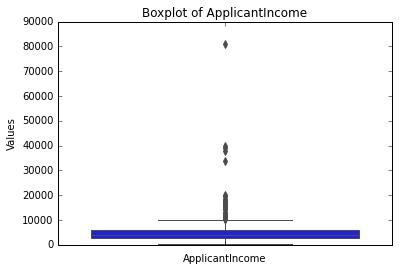

CoapplicantIncome


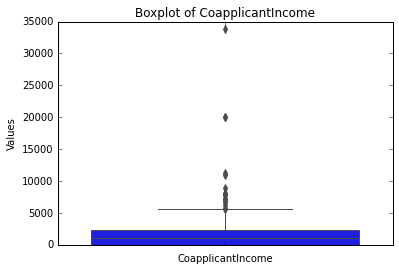

LoanAmount


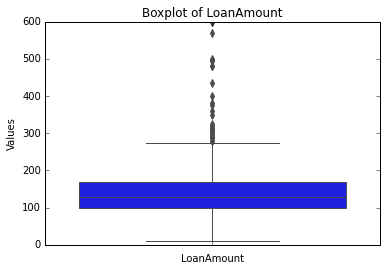

Loan_Amount_Term


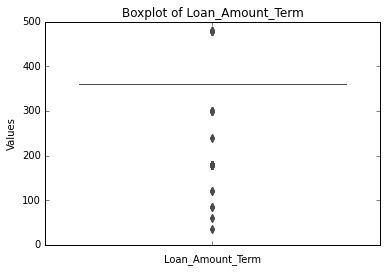

In [26]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

In [27]:
# Encode Categorical Columns
categorical_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Data_Day[categorical_var] = Data_Day[categorical_var].apply(le.fit_transform)
Data_Day

Gender  Married  Dependents  ...  Credit_History  Property_Area  Loan_Status
1         1        1           1  ...               1              0            0
2         1        1           0  ...               1              2            1
3         1        1           0  ...               1              2            1
4         1        0           0  ...               1              2            1
5         1        1           2  ...               1              2            1
..      ...      ...         ...  ...             ...            ...          ...
609       0        0           0  ...               1              0            1
610       1        1           3  ...               1              0            1
611       1        1           1  ...               1              2            1
612       1        1           2  ...               1              2            1
613       0        0           0  ...               0              1            0

[480 rows x 12 columns]

In [28]:
#Outlier analysis

In [29]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))

# replace outliers with NA
    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

ApplicantIncome
Innerfence= -1531.875
Upperfence= 10283.125
IQR =2953.75
CoapplicantIncome
Innerfence= -3379.875
Upperfence= 5633.125
IQR =2253.25
LoanAmount
Innerfence= -5.0
Upperfence= 275.0
IQR =70.0
Loan_Amount_Term
Innerfence= 360.0
Upperfence= 360.0
IQR =0.0


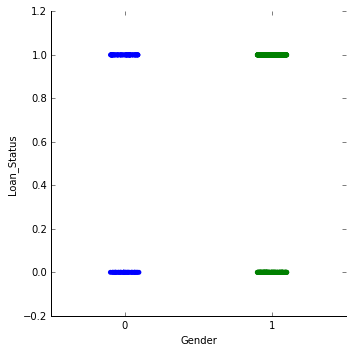

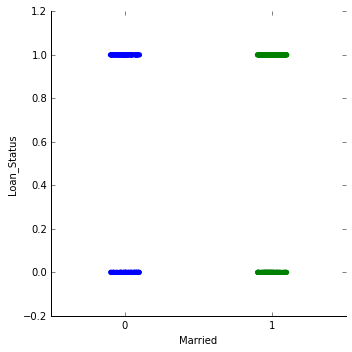

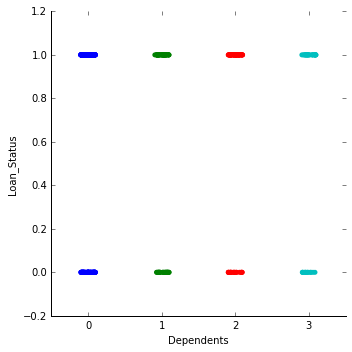

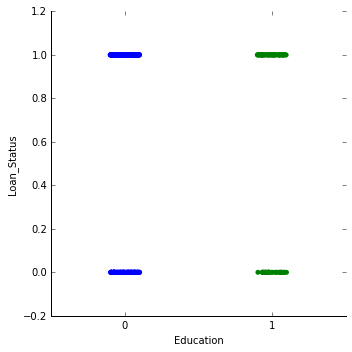

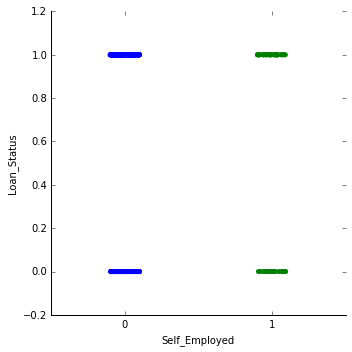

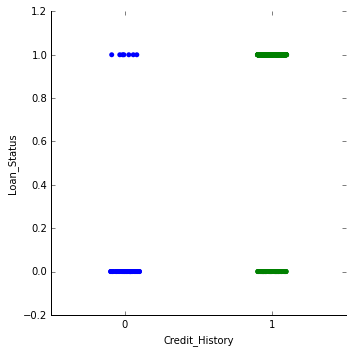

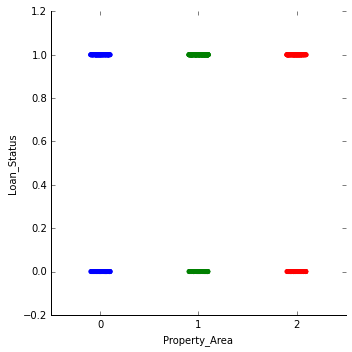

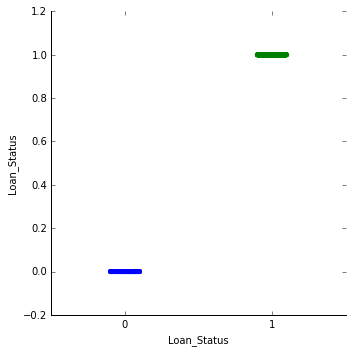

In [30]:
for i in categorical_var:
  sns.catplot(x = i, y = "Loan_Status", data=Data_Day, linewidths=.15)

                     Gender   Married  ...  Property_Area  Loan_Status
Gender             1.000000  0.349424  ...      -0.000204     0.064504
Married            0.349424  1.000000  ...       0.038653     0.112321
Dependents         0.217510  0.386367  ...       0.001191     0.035428
Education          0.059245  0.001652  ...      -0.055005    -0.068437
Self_Employed     -0.002761  0.015674  ...      -0.050797    -0.034715
ApplicantIncome    0.082987  0.007068  ...      -0.105865     0.018974
CoapplicantIncome  0.211122  0.235726  ...      -0.091339     0.036442
LoanAmount         0.155480  0.197060  ...      -0.067199    -0.015391
Loan_Amount_Term        NaN       NaN  ...            NaN          NaN
Credit_History     0.022447  0.029095  ...      -0.003013     0.529390
Property_Area     -0.000204  0.038653  ...       1.000000     0.031361
Loan_Status        0.064504  0.112321  ...       0.031361     1.000000

[12 rows x 12 columns]


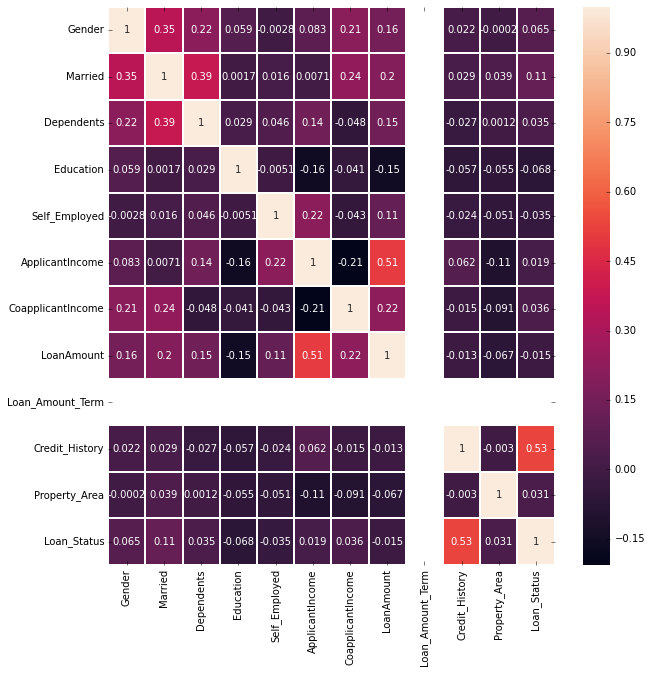

In [31]:
#Feature engineering
# Correlation Analysis and Anova test to find varaibles which can be excluded
var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Data_Day_cor = Data_Day.loc[:, var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)
fig, ax = plt.subplots(figsize=(10,10)) ##To plot the heatmap into our required size
heatmap = sns.heatmap(correlation_result, annot=True, linewidths=1)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


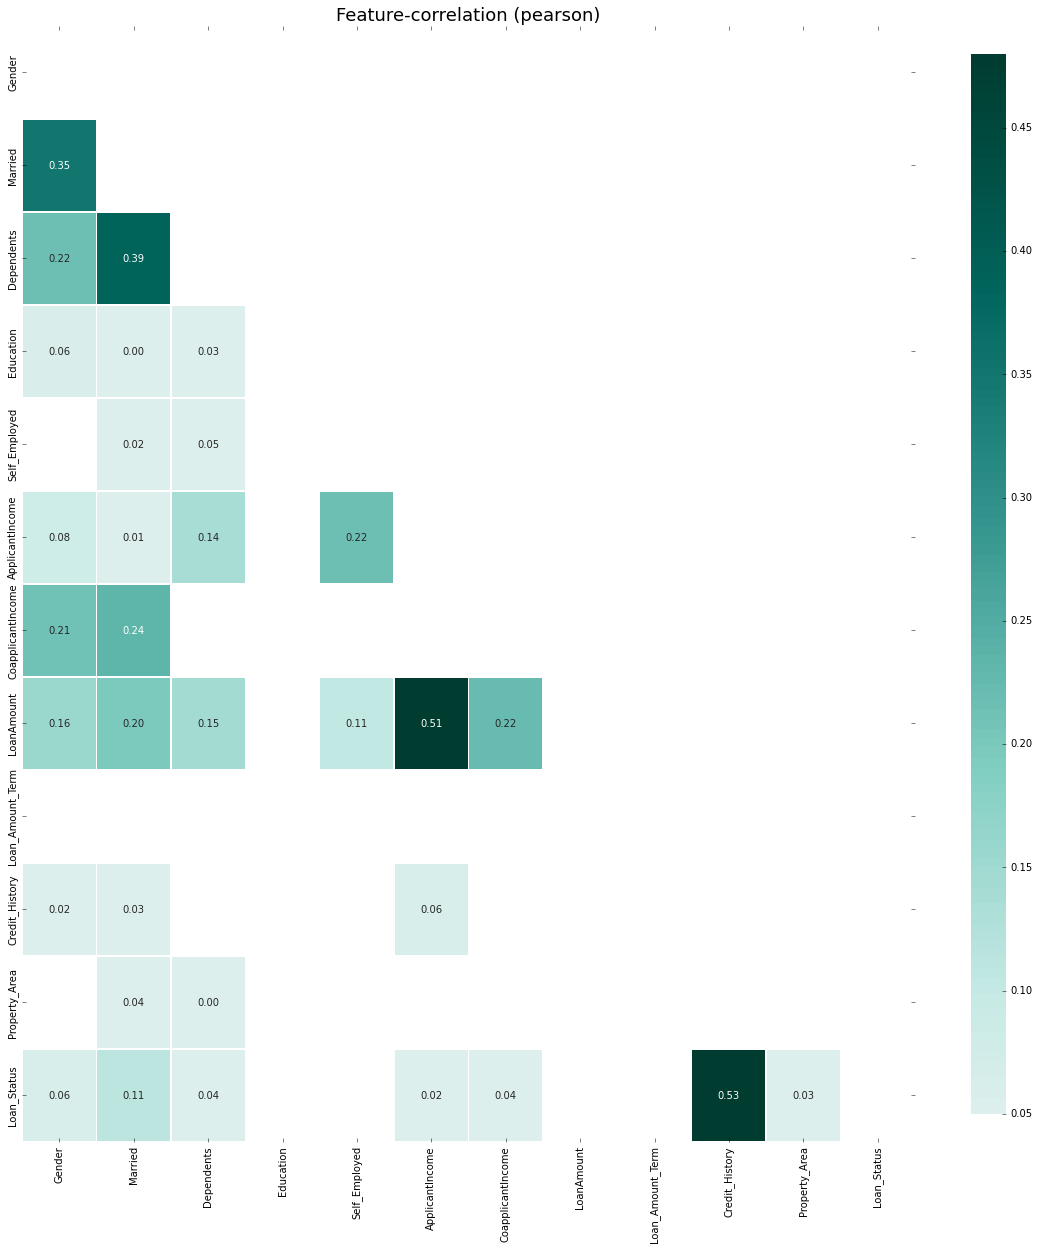

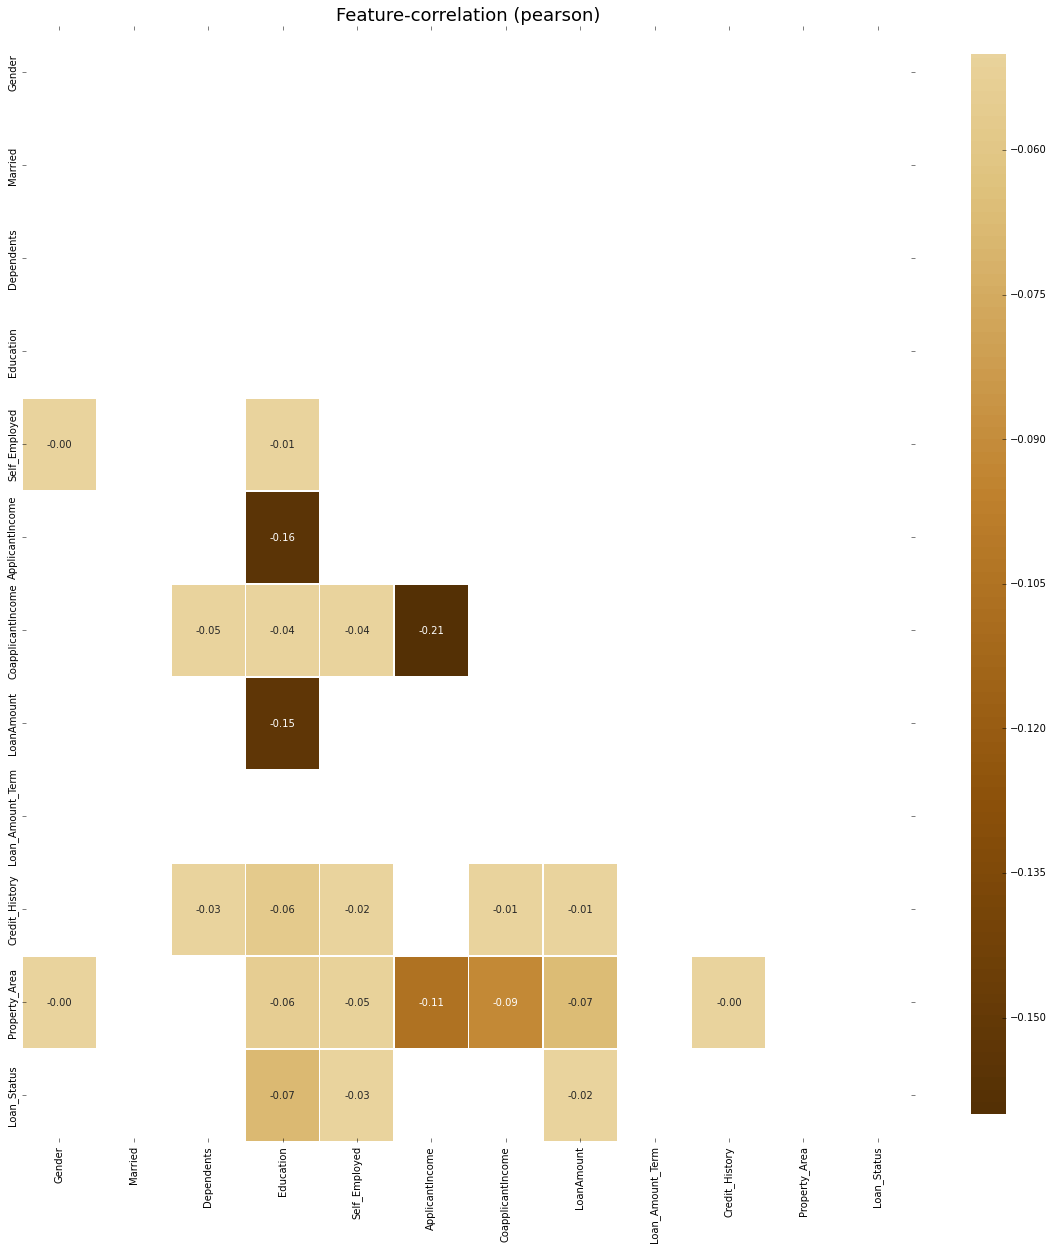

In [32]:
klib.corr_plot(Data_Day, split="pos", figsize=(20,20))
klib.corr_plot(Data_Day, split="neg", figsize=(20,20))

Having a look at we can say that Loan amount term has no relationship with the data, also, 'Education', 'Self_Employed', 'Property_Area' has very poor relationship with the rest of the variable, therefore these can be remoived.

In [33]:
Data_Day.describe()

Gender     Married  ...  Property_Area  Loan_Status
count  480.000000  480.000000  ...     480.000000   480.000000
mean     0.820833    0.647917  ...       1.022917     0.691667
std      0.383892    0.478118  ...       0.776411     0.462287
min      0.000000    0.000000  ...       0.000000     0.000000
25%      1.000000    0.000000  ...       0.000000     0.000000
50%      1.000000    1.000000  ...       1.000000     1.000000
75%      1.000000    1.000000  ...       2.000000     1.000000
max      1.000000    1.000000  ...       2.000000     1.000000

[8 rows x 12 columns]

In [34]:
Data_Day.drop(['Education', 'Self_Employed', 'Property_Area', 'Loan_Amount_Term'], axis='columns', inplace = True)
Data_Day

Gender  Married  Dependents  ...  LoanAmount  Credit_History  Loan_Status
1         1        1           1  ...       128.0               1            0
2         1        1           0  ...        66.0               1            1
3         1        1           0  ...       120.0               1            1
4         1        0           0  ...       141.0               1            1
5         1        1           2  ...       267.0               1            1
..      ...      ...         ...  ...         ...             ...          ...
609       0        0           0  ...        71.0               1            1
610       1        1           3  ...        40.0               1            1
611       1        1           1  ...       253.0               1            1
612       1        1           2  ...       187.0               1            1
613       0        0           0  ...       133.0               0            0

[480 rows x 8 columns]

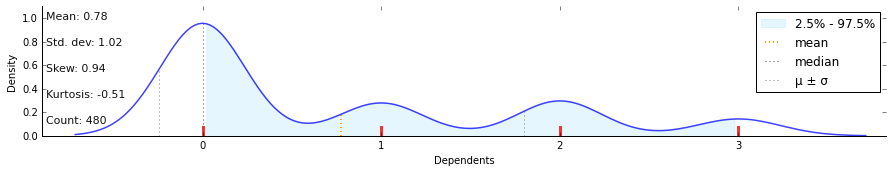

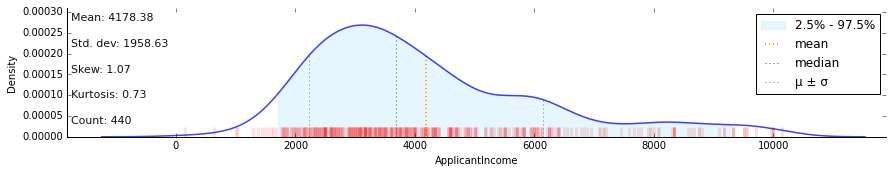

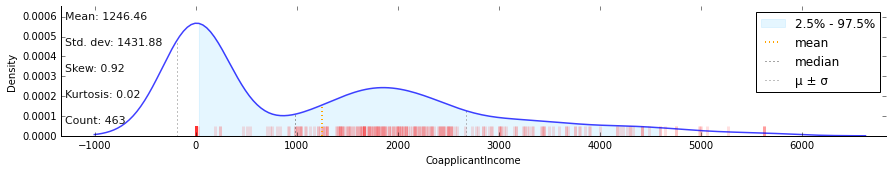

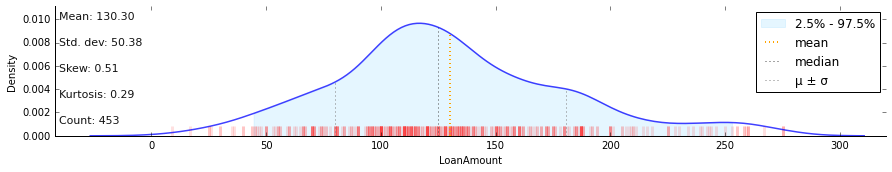

In [35]:
#Feature scalling
klib.dist_plot(Data_Day)

***Here we can eaisly infer that almost every variable is distributed  allmost normely in bell curve, except some nitty gritty deviation in some variable.

In [36]:
!pip install pycaret[Full]==2.3. 4

In [37]:
from pycaret.classification import *
exp1 = setup(Data_Day, target = 'Loan_Status')

Description             Value
0                               session_id              2677
1                                   Target       Loan_Status
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data          (480, 8)
5                           Missing Values              True
6                         Numeric Features                 3
7                     Categorical Features                 4
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (335, 10)
12                    Transformed Test Set         (145, 10)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              7d59
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52                Feature Selection Method           classic
53            Features Selection Threshold              None
54                     Feature Interaction             False
55                           Feature Ratio             False
56                   Interaction Threshold              None
57                           Fix Imbalance             False
58                    Fix Imbalance Method             SMOTE

In [38]:
best_model = compare_models()   ##10 folds fitted & compared models.

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8206  0.6847  0.9832  0.8079   
ridge                    Ridge Classifier    0.8206  0.0000  0.9832  0.8079   
lda          Linear Discriminant Analysis    0.8206  0.6978  0.9832  0.8079   
nb                            Naive Bayes    0.8145  0.6940  0.9745  0.8062   
catboost              CatBoost Classifier    0.8027  0.7400  0.9661  0.7996   
rf               Random Forest Classifier    0.7816  0.7360  0.9279  0.7990   
lightgbm  Light Gradient Boosting Machine    0.7791  0.7507  0.9109  0.8048   
ada                  Ada Boost Classifier    0.7786  0.6736  0.9196  0.8004   
xgboost         Extreme Gradient Boosting    0.7762  0.7515  0.8940  0.8126   
et                 Extra Trees Classifier    0.7635  0.7008  0.9024  0.7937   
gbc          Gradient Boosting Classifier    0.7579  0.6772  0.8848  0.7968   
dt               Decision Tree Classifier    0.7105  0.6648  0.7795  0.8079   
qda       Quadratic Discriminant Analysis    0.6828  0.6477  0.7473  0.7112   
knn                K Neighbors Classifier    0.6537  0.5574  0.8299  0.7232   
svm                   SVM - Linear Kernel    0.5754  0.0000  0.6784  0.5685   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8860  0.4835  0.5472     0.214  
ridge     0.8860  0.4835  0.5472     0.023  
lda       0.8860  0.4835  0.5472     0.025  
nb        0.8815  0.4709  0.5265     0.023  
catboost  0.8738  0.4380  0.4942     1.426  
rf        0.8567  0.4045  0.4416     0.551  
lightgbm  0.8532  0.4105  0.4316     0.102  
ada       0.8540  0.4003  0.4310     0.128  
xgboost   0.8496  0.4124  0.4274     1.005  
et        0.8429  0.3694  0.3932     0.479  
gbc       0.8371  0.3662  0.3813     0.103  
dt        0.7897  0.3165  0.3249     0.025  
qda       0.7208  0.2891  0.3161     0.024  
knn       0.7708  0.0569  0.0475     0.124  
svm       0.5871 -0.0042 -0.0070     0.023

In [39]:
# check the best model
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2677, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [40]:
# predict on hold-out
pred_holdout = predict_model(best_model)  

Model  Accuracy    AUC  Recall   Prec.      F1   Kappa    MCC
0  Logistic Regression    0.7793  0.742  0.9688  0.7623  0.8532  0.4332  0.488

In [41]:
catboost = create_model('catboost')   ##10 folds fitted & compared models.

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8529  0.7958  1.0000  0.8276  0.9057  0.5854  0.6433
1       0.7941  0.7542  1.0000  0.7742  0.8727  0.3770  0.4819
2       0.8235  0.7083  1.0000  0.8000  0.8889  0.4848  0.5657
3       0.7941  0.7583  0.9167  0.8148  0.8627  0.4566  0.4695
4       0.8529  0.8458  0.9583  0.8519  0.9020  0.6119  0.6292
5       0.7576  0.6204  0.9167  0.7857  0.8462  0.2903  0.3105
6       0.8485  0.8130  0.9130  0.8750  0.8936  0.6309  0.6326
7       0.7879  0.7696  1.0000  0.7667  0.8679  0.3740  0.4796
8       0.7273  0.5783  0.9565  0.7333  0.8302  0.1951  0.2502
9       0.7879  0.7565  1.0000  0.7667  0.8679  0.3740  0.4796
Mean    0.8027  0.7400  0.9661  0.7996  0.8738  0.4380  0.4942
SD      0.0399  0.0793  0.0369  0.0410  0.0230  0.1358  0.1262

In [42]:
tuned_model = tune_model(catboost)   ##10 folds fitted & compared models.

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8824  0.8167  1.0000  0.8571  0.9231  0.6792  0.7171
1       0.8235  0.6271  1.0000  0.8000  0.8889  0.4848  0.5657
2       0.8235  0.7375  1.0000  0.8000  0.8889  0.4848  0.5657
3       0.8235  0.7833  0.9583  0.8214  0.8846  0.5189  0.5478
4       0.8529  0.8833  0.9583  0.8519  0.9020  0.6119  0.6292
5       0.7879  0.6296  0.9583  0.7931  0.8679  0.3529  0.3980
6       0.8788  0.7891  0.9565  0.8800  0.9167  0.6959  0.7040
7       0.7879  0.7174  1.0000  0.7667  0.8679  0.3740  0.4796
8       0.7576  0.5326  1.0000  0.7419  0.8519  0.2584  0.3852
9       0.7879  0.5891  1.0000  0.7667  0.8679  0.3740  0.4796
Mean    0.8206  0.7106  0.9832  0.8079  0.8860  0.4835  0.5472
SD      0.0393  0.1064  0.0206  0.0422  0.0218  0.1389  0.1089

In [43]:
catboost_bagged = ensemble_model(catboost)   ##This is a begging based enselmbled model by default. For boositing we would need to use boosting as paramenter.

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8824  0.8250  1.0000  0.8571  0.9231  0.6792  0.7171
1       0.7941  0.7417  0.9583  0.7931  0.8679  0.4195  0.4610
2       0.8235  0.7125  1.0000  0.8000  0.8889  0.4848  0.5657
3       0.8235  0.7500  0.9583  0.8214  0.8846  0.5189  0.5478
4       0.8529  0.8375  0.9583  0.8519  0.9020  0.6119  0.6292
5       0.7879  0.6435  0.9583  0.7931  0.8679  0.3529  0.3980
6       0.8485  0.8174  0.9130  0.8750  0.8936  0.6309  0.6326
7       0.7879  0.7826  1.0000  0.7667  0.8679  0.3740  0.4796
8       0.7576  0.5783  1.0000  0.7419  0.8519  0.2584  0.3852
9       0.7879  0.7565  1.0000  0.7667  0.8679  0.3740  0.4796
Mean    0.8146  0.7445  0.9746  0.8067  0.8816  0.4705  0.5296
SD      0.0363  0.0781  0.0284  0.0416  0.0199  0.1311  0.1026

***Ensembling is not coming usp with better results therefore we may consider tuned_model for further analysis.***

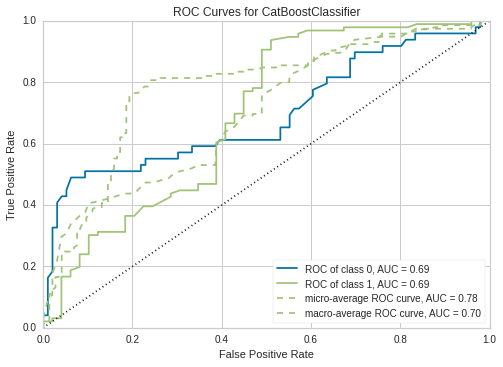

In [44]:
# AUC plot
plot_model(tuned_model, plot = 'auc')

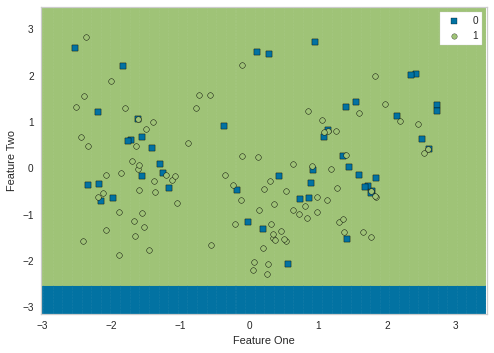

In [45]:
# Decision Boundary
plot_model(tuned_model, plot = 'boundary')

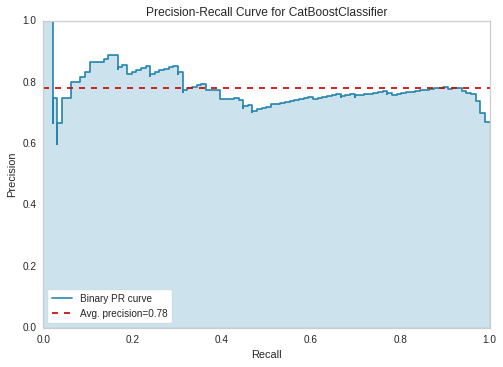

In [46]:
# Precision Recall Curve
plot_model(tuned_model, plot = 'pr')

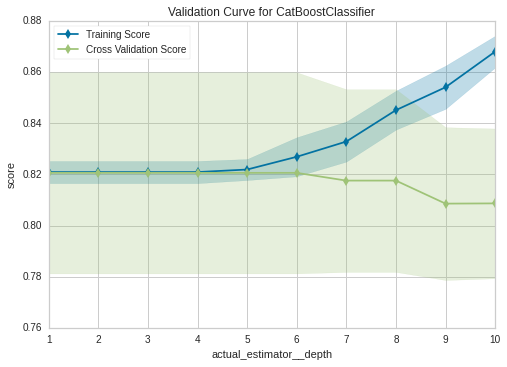

In [47]:
# Validation Curve
plot_model(tuned_model, plot = 'vc')

In [48]:
evaluate_model(tuned_model) ###Clicking atr various icons wilkl producs respective graphs

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [49]:
evaluate_model(tuned_model) ###Clicking atr various icons wilkl produces respective graphs on a live kernel

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

***TypeError:*** This function only supports tree based models for binary classification: xgboost, catboost, rf, et, lightgbm, dt.

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8529  0.7958  1.0000  0.8276  0.9057  0.5854  0.6433
1       0.7941  0.7542  1.0000  0.7742  0.8727  0.3770  0.4819
2       0.8235  0.7083  1.0000  0.8000  0.8889  0.4848  0.5657
3       0.7941  0.7583  0.9167  0.8148  0.8627  0.4566  0.4695
4       0.8529  0.8458  0.9583  0.8519  0.9020  0.6119  0.6292
5       0.7576  0.6204  0.9167  0.7857  0.8462  0.2903  0.3105
6       0.8485  0.8130  0.9130  0.8750  0.8936  0.6309  0.6326
7       0.7879  0.7696  1.0000  0.7667  0.8679  0.3740  0.4796
8       0.7273  0.5783  0.9565  0.7333  0.8302  0.1951  0.2502
9       0.7879  0.7565  1.0000  0.7667  0.8679  0.3740  0.4796
Mean    0.8027  0.7400  0.9661  0.7996  0.8738  0.4380  0.4942
SD      0.0399  0.0793  0.0369  0.0410  0.0230  0.1358  0.1262

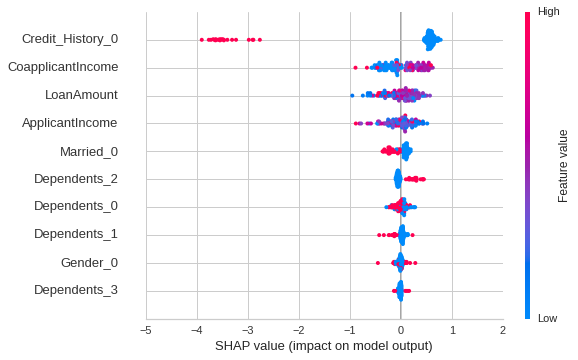

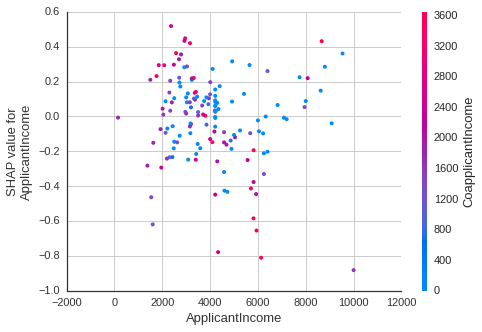

In [50]:
# create a model
catboost = create_model('catboost')
# summary plot
interpret_model(catboost)
# correlation plot
interpret_model(catboost, plot = 'correlation')

In [51]:
# predict test / hold-out dataset
catboost_holdout_pred = predict_model(catboost)

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  CatBoost Classifier    0.7931  0.7348  ...  0.8585  0.4863  0.5176

[1 rows x 8 columns]

In [52]:
predictions = predict_model(catboost, data = Data_Day)
predictions

Gender  Married  Dependents  ...  Loan_Status  Label   Score
1         1        1           1  ...            0      1  0.9142
2         1        1           0  ...            1      1  0.5891
3         1        1           0  ...            1      1  0.9661
4         1        0           0  ...            1      1  0.8412
5         1        1           2  ...            1      1  0.9373
..      ...      ...         ...  ...          ...    ...     ...
609       0        0           0  ...            1      1  0.8440
610       1        1           3  ...            1      1  0.8688
611       1        1           1  ...            1      1  0.8732
612       1        1           2  ...            1      1  0.7905
613       0        0           0  ...            0      0  0.9515

[480 rows x 10 columns]

In [53]:
evaluate_model(tuned_model)   ###Clicking atr various icons wilkl produces respective graphs on a live kernel

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…